O objetivo deste projeto é prever os preços que casas foram vendidas. O banco de dados é da competição presente no [Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques).

Foi usado um modelo *Supervised, offline e Model-based*, com a métrica *RMSE (Root Mean Squared Error)*

In [92]:
import pandas as pd
import numpy as np

# Exploration
import seaborn as sns
import matplotlib.pyplot as plt

# Stats
from scipy.stats import norm

# Data Preparation
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.compose import ColumnTransformer

# Models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Metrics
from sklearn.model_selection import cross_val_score

# Hyperparameters
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


# Configs
import warnings
warnings.filterwarnings(action="ignore")
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000
pd.set_option('display.max_columns', None)

# Importando dataset

In [93]:
# Read the dataset
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
train.shape, test.shape

((1460, 81), (1459, 80))

# Análise exploratória

Nosso objetivo é prever a coluna `SalePrice`

In [94]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [95]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Analisando nosso *label* `SalePrice`

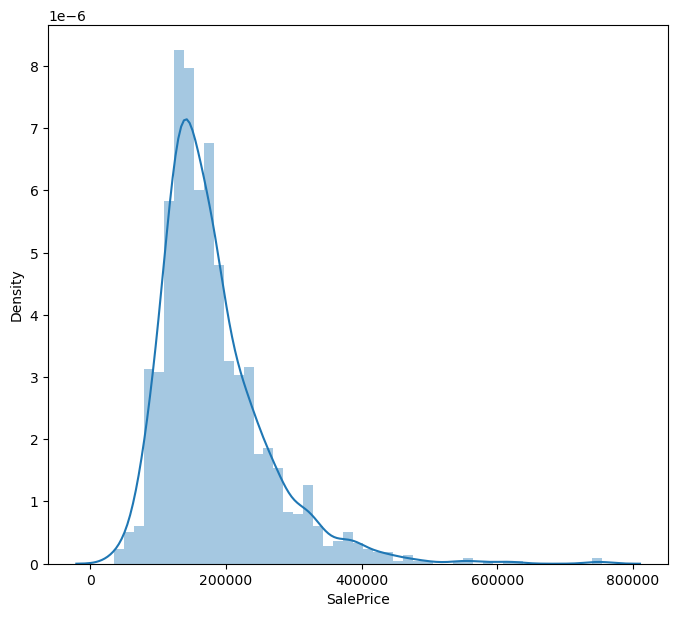

In [96]:
plt.subplots(figsize=(8, 7))
sns.distplot(train['SalePrice'])
plt.show()

In [97]:
print('Curtose: %f' % train.SalePrice.kurt())
print('Assimetria: %f' %train.SalePrice.skew())

Curtose: 6.536282
Assimetria: 1.882876


In [98]:
# Coletando features numericas
numeric_features = train.select_dtypes(include='number').columns.tolist()

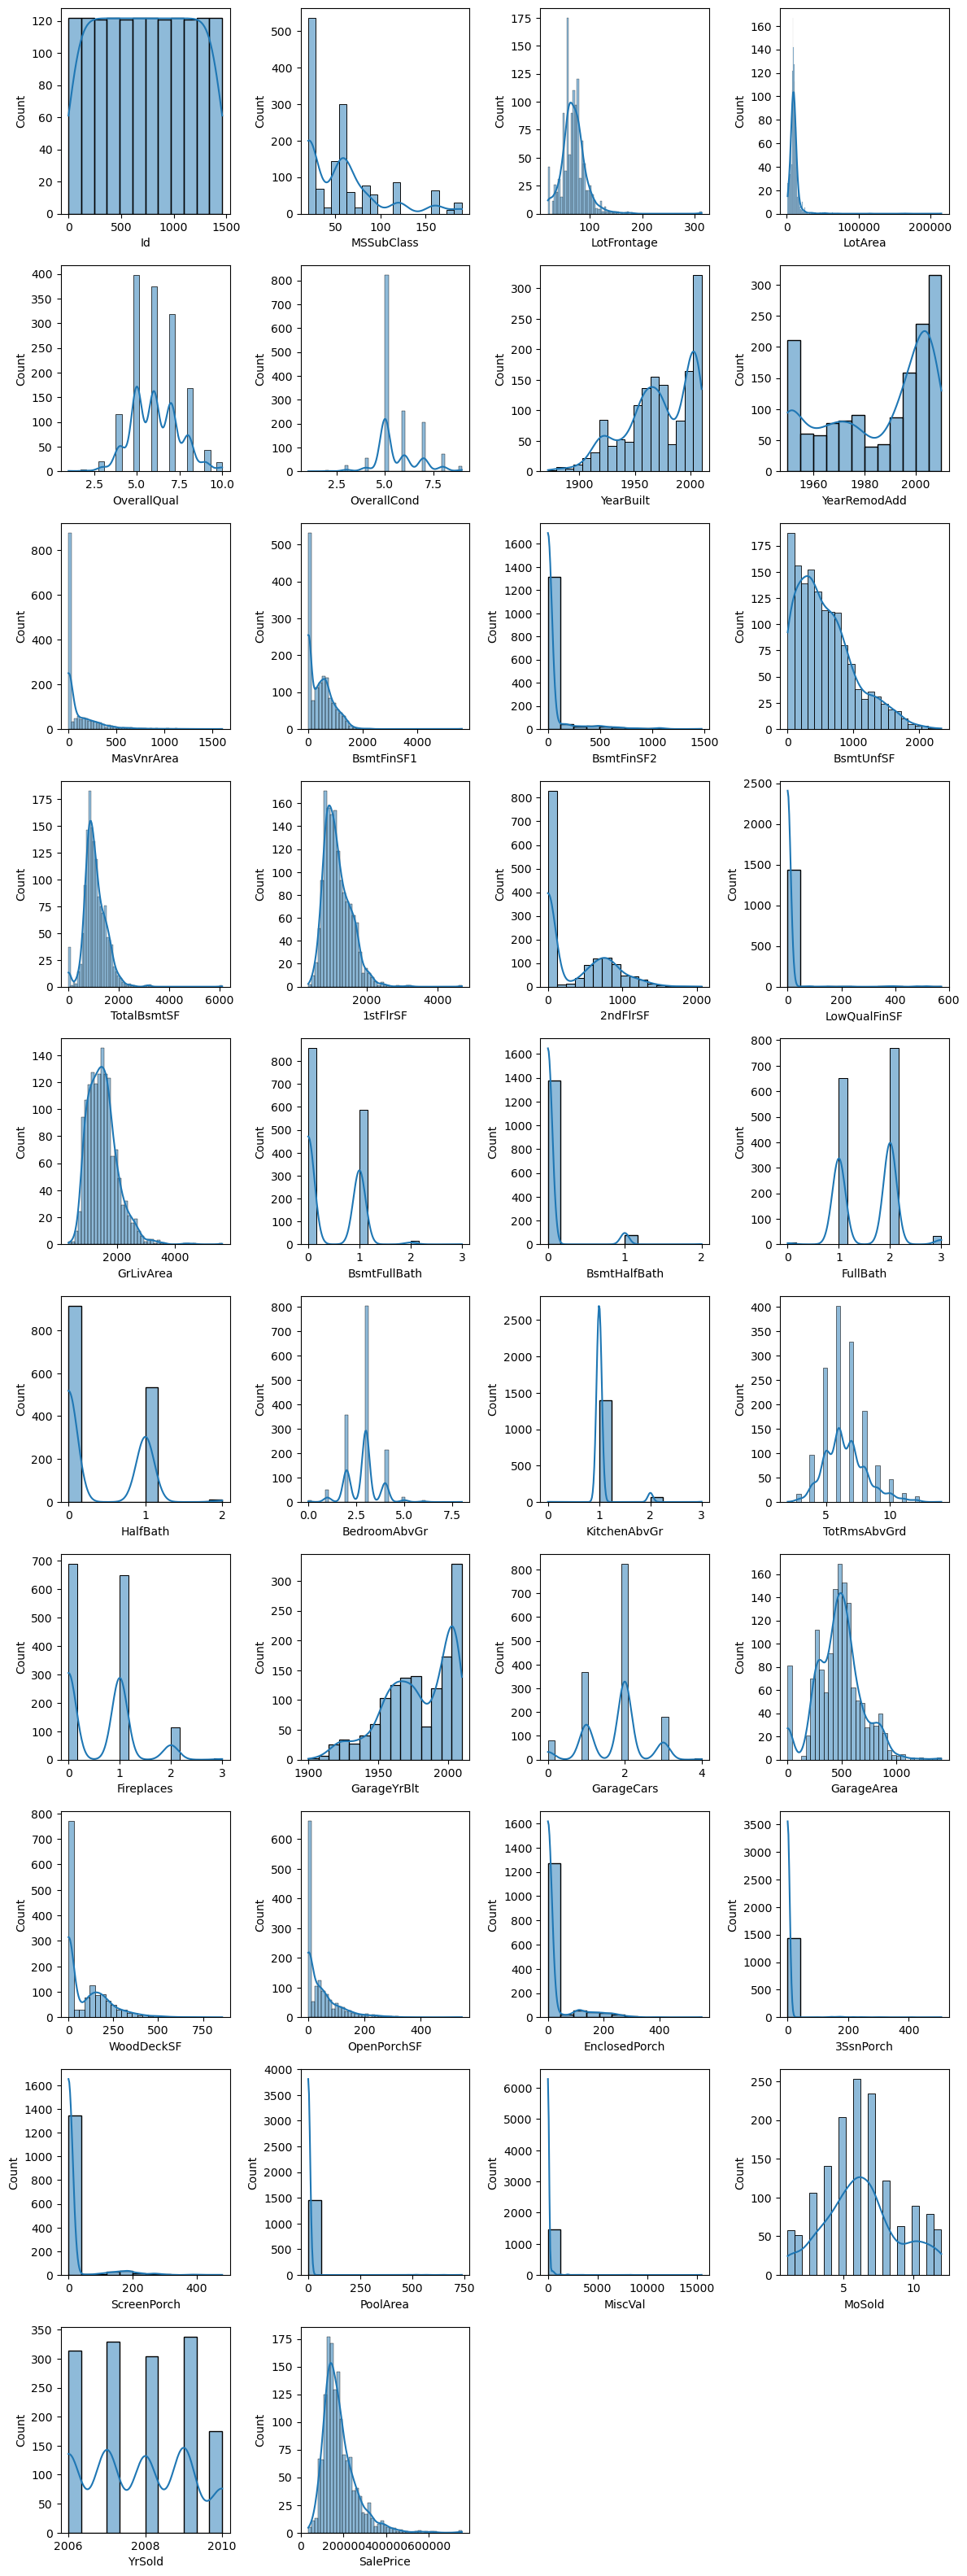

In [99]:
# Distribuições das features
fig, axes = plt.subplots(figsize=(12, 120))

for i, feature in enumerate(list(train[numeric_features]), 1):
    plt.subplot(len(numeric_features), 4, i)
    sns.histplot(data=train, x=feature, kde= True)

plt.tight_layout()
plt.show()


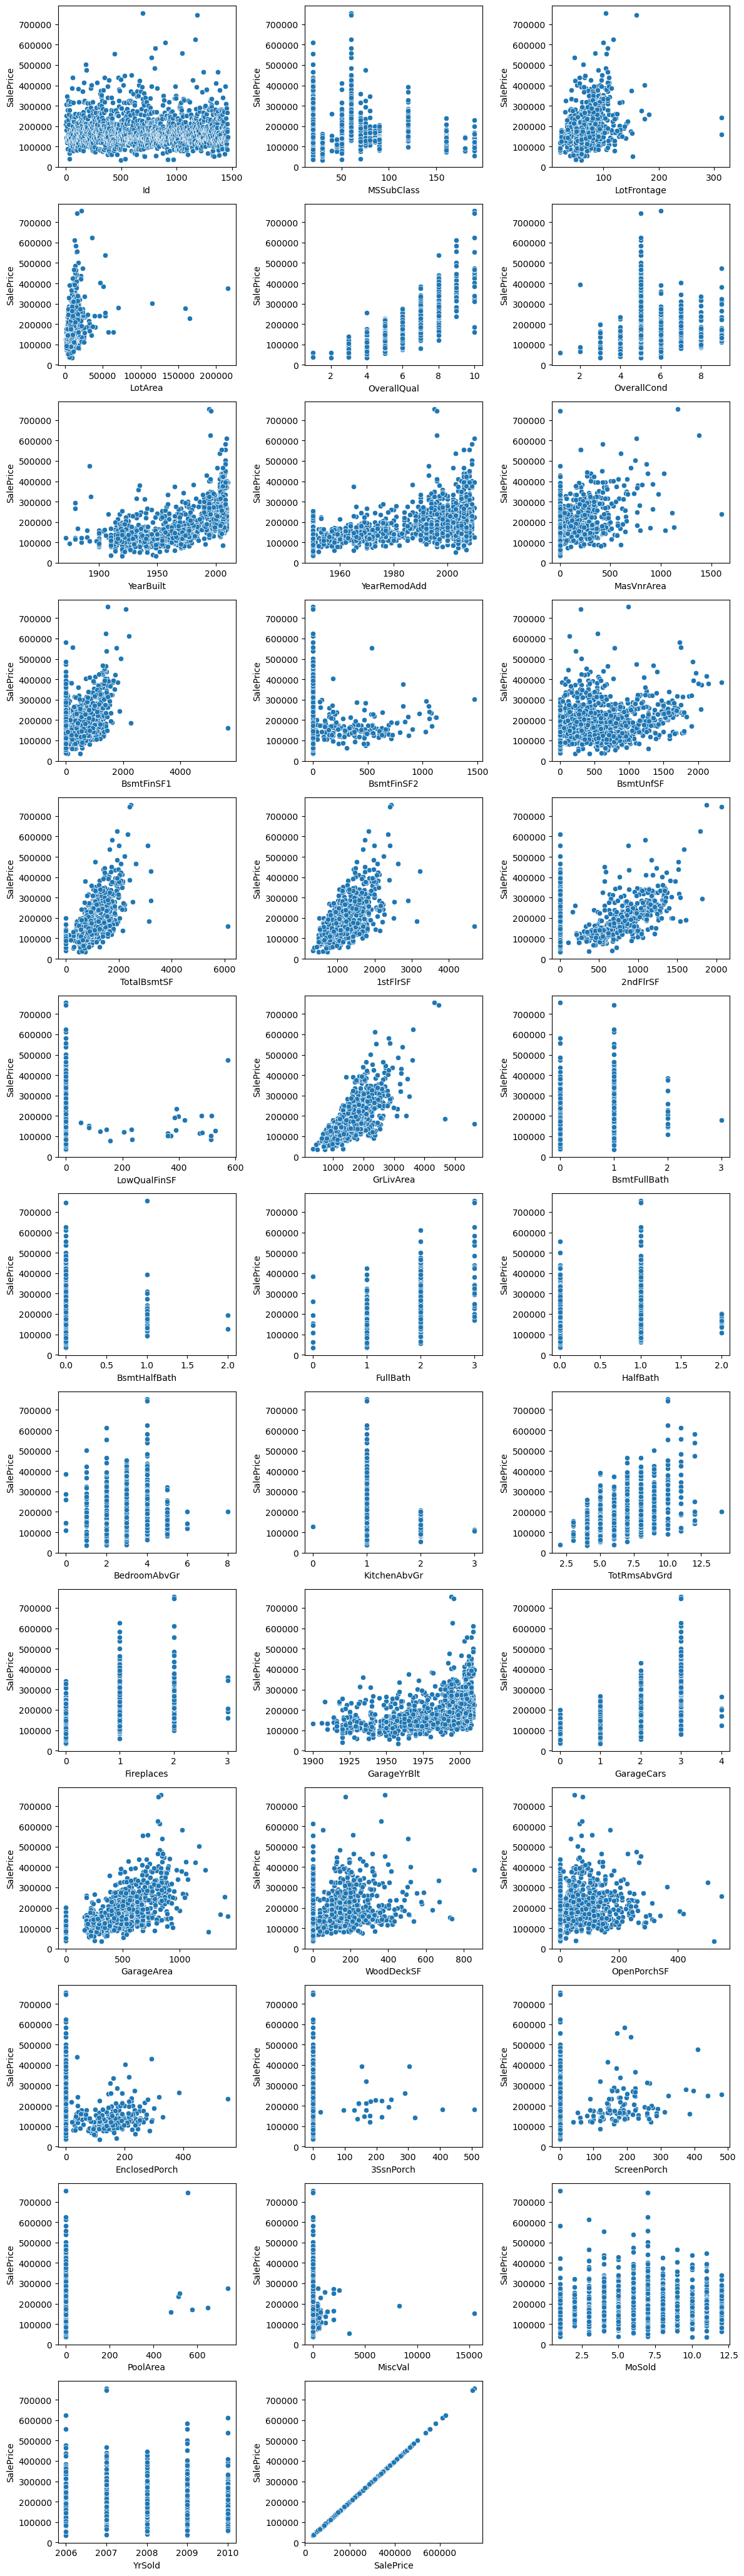

In [100]:
# Visualizando alguns outliers
fig, axes = plt.subplots(figsize=(12, 120))

for i, feature in enumerate(list(train[numeric_features]), 1):
    plt.subplot(len(numeric_features), 3, i)
    sns.scatterplot(data=train, x=feature,y= 'SalePrice')

plt.tight_layout()
plt.show()

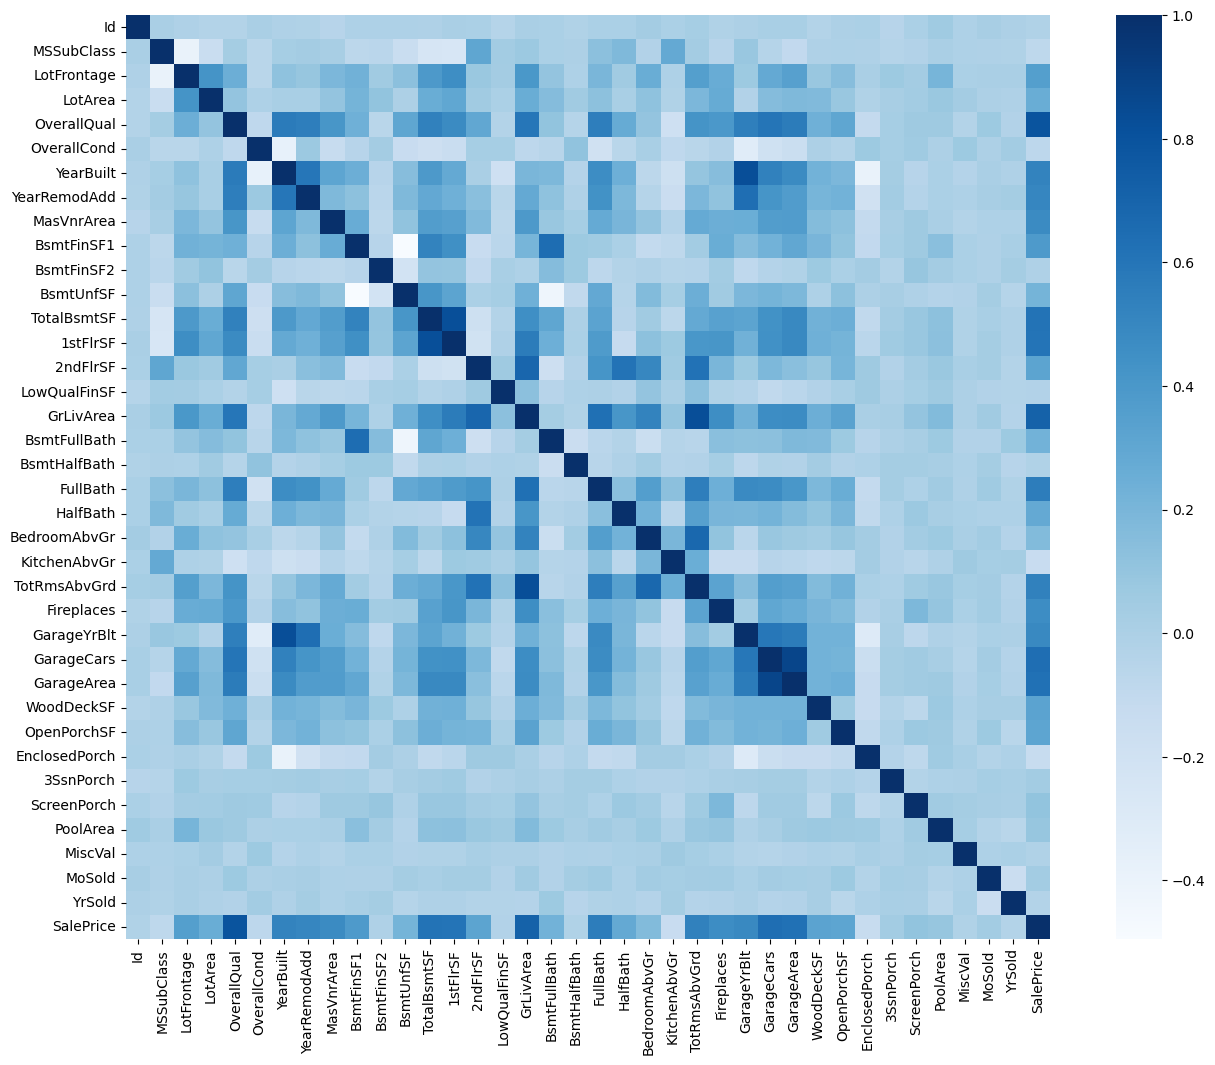

In [101]:
# Correlações
corr = train.corr()
plt.subplots(figsize= (17,12))
sns.heatmap(corr, square=True, cmap= 'Blues')
plt.show()

In [102]:
# Detectando valores faltantes
def missing_values(df):
    total = df.isnull().sum()
    percent = round(df.isnull().sum()/len(df)*100, 2)
    concat = pd.concat([total, percent], axis= 1, keys=['Total', '%'])
    return concat.loc[concat['Total'] != 0].sort_values(by= ['Total'], ascending= False)

missing_values(train)

,Total,%
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55
GarageQual,81,5.55


# Preparando os dados

O label não possui uma distribuição normal, então aplico uma transformação usando logaritmo natural

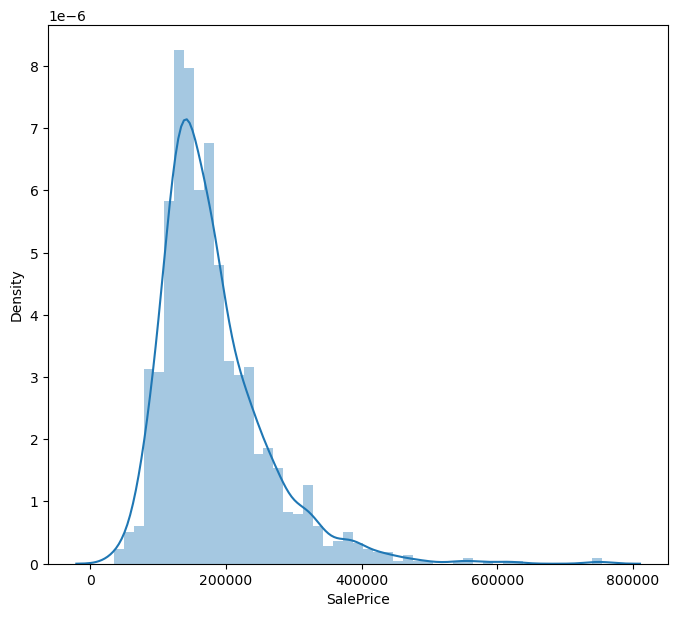

In [103]:
plt.subplots(figsize=(8, 7))
sns.distplot(train['SalePrice'])
plt.show()

In [104]:
# log transform
train['SalePrice'] = np.log(train.SalePrice)

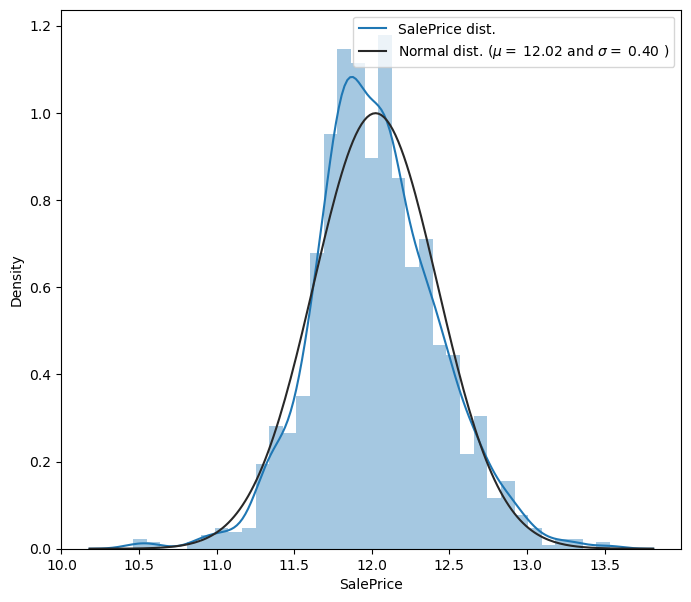

In [105]:
plt.subplots(figsize=(8, 7))
sns.distplot(train['SalePrice'], fit= norm)

mu, sigma = norm.fit(train['SalePrice'])
plt.legend(['SalePrice dist.','Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.show()


## Limpeza dos dados

In [106]:
# Removendo outliers
train.drop(train[train['LotFrontage'] > 250].index, inplace= True)
train.drop(train[train['GrLivArea'] > 4500].index, inplace=True)
train.drop(train[(train['OverallQual']<5) & (train['SalePrice']>200000)].index, inplace=True)
train.drop(train[(train['OverallCond']<5) & (train['SalePrice']>300000)].index, inplace=True)
train.drop(train[train['BsmtFinSF1'] > 4000].index, inplace=True)
train.drop(train[train['TotalBsmtSF'] > 5000].index, inplace=True)
train.drop(train[train['1stFlrSF'] > 4000].index, inplace= True)

train.reset_index(drop=True, inplace=True)

train.shape

(1457, 81)

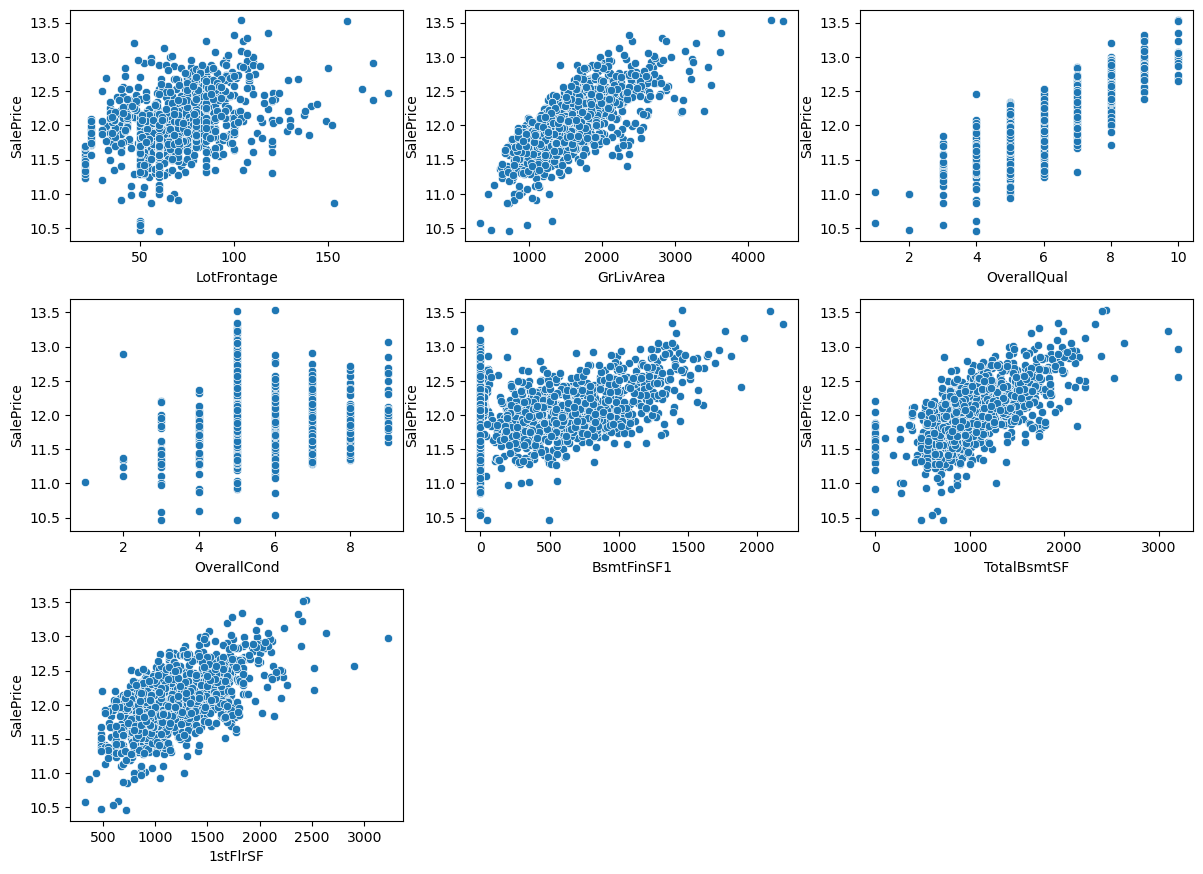

In [107]:
removed_outliers = ['LotFrontage','GrLivArea','OverallQual','OverallCond','BsmtFinSF1','TotalBsmtSF', '1stFlrSF']

# Visualizando alguns outliers
fig, axes = plt.subplots(figsize=(12, 20))

for i, feature in enumerate(list(train[removed_outliers]), 1):
    plt.subplot(len(removed_outliers), 3, i)
    sns.scatterplot(data=train, x=feature,y= 'SalePrice')

plt.tight_layout()
plt.show()

In [108]:
# Dividindo features e labels
train_labels = train['SalePrice'].reset_index(drop= True)
train_features = train.drop(['SalePrice'], axis=1)
test_features = test

# Features unidas
combine = pd.concat([train_features, test_features]).reset_index(drop= True)
combine.shape

(2916, 80)

In [109]:
# Transformando variaveis que deveriam ser discretas
combine['MSSubClass'] = combine['MSSubClass'].apply(str)
combine['YrSold'] = combine['YrSold'].astype(str)
combine['MoSold'] = combine['MoSold'].astype(str)

In [110]:
# Removendo valores nulos
missing_values(combine)

,Total,%
PoolQC,2907,99.69
MiscFeature,2811,96.40
Alley,2718,93.21
Fence,2345,80.42
FireplaceQu,1420,48.70
LotFrontage,486,16.67
GarageFinish,159,5.45
GarageQual,159,5.45
GarageCond,159,5.45
GarageYrBlt,159,5.45


No arquivo de descrição das variáveis temos informações que valores faltantes `NA` na verdade representam que a casa não possui tal caracteristica.

In [111]:
def missing_fix(features):
    # Determina o valor de acordo com o data_description
    features['Functional'] = features['Functional'].fillna('Typ')
    
    # Determina de acordo com a moda
    features['Electrical'] = features['Electrical'].fillna(features['Electrical'].mode()[0])
    features['KitchenQual'] = features['KitchenQual'].fillna(features['KitchenQual'].mode()[0])
    features['Exterior1st'] = features['Exterior1st'].fillna(features['Exterior1st'].mode()[0])
    features['Exterior2nd'] = features['Exterior2nd'].fillna(features['Exterior2nd'].mode()[0])
    features['SaleType'] = features['SaleType'].fillna(features['SaleType'].mode()[0])
    
    # Determina de acordo com features semelhantes
    features['MSZoning'] = features.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))
    features['LotFrontage'] = features.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
    features['Utilities'] = features.groupby('MSSubClass')['Utilities'].transform(lambda x: x.fillna(x.mode()[0]))

    # None para categoricas
    objects = []
    for i in features.columns:
        if features[i].dtype == object:
            objects.append(i)
    features.update(features[objects].fillna('None'))

    # 0 para numericas
    numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    numeric = []
    for i in features.columns:
        if features[i].dtype in numeric_dtypes:
            numeric.append(i)
    features.update(features[numeric].fillna(0))    
    
    return features

combine = missing_fix(combine)
missing_values(combine)

,Total,%


## Feature Engineering

In [112]:
# Criando a variável area total
combine['TotalSF'] = combine['TotalBsmtSF'] + combine['1stFlrSF'] + combine['2ndFlrSF']

In [113]:
numeric_features = combine.select_dtypes(include='number').columns.tolist()
categoric_features = combine.select_dtypes(include= 'object').columns.tolist()

# Categoricas
## Ordinais
ord_features = ['LotShape', 'LandContour', 'Utilities', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 
                'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu',
                'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence']
## Nominais
nom_features = list(set(categoric_features) - set(ord_features))

# Numericas
## Discretas
disc_features = ['OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
                'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars']
## Continuas
cont_features = list(set(numeric_features) - set(disc_features))

Aplicando Encoding as variáveis

In [114]:
full_pipeline = ColumnTransformer([
    ('ord_enc', OrdinalEncoder(), ord_features),
    ('one_hot', OneHotEncoder(), nom_features),
    ('strd', StandardScaler(), cont_features),
    ], remainder= 'passthrough')

combine_tr = full_pipeline.fit_transform(combine)

train_features_tr = combine_tr[:len(train_labels), :]
test_features_tr = combine_tr[len(train_labels):, :]

# Lista de modelos

Estou usando K-fold cross-validation com 12 folds para avaliar os modelos

In [115]:
# Função para a métrica
def cv_rmse(model, X=train_features_tr):
    rmse = np.sqrt(-cross_val_score(model, X, train_labels, scoring="neg_mean_squared_error", cv=12))
    return (rmse)

scores = []

In [116]:
# Modelos
tree_reg = DecisionTreeRegressor(random_state=12)
forest_reg = RandomForestRegressor(random_state=12)

In [117]:
# Fit
tree_reg.fit(train_features_tr, train_labels)
forest_reg.fit(train_features_tr, train_labels)

# Predict Train
tree_pred = tree_reg.predict(train_features_tr)
forest_pred = forest_reg.predict(train_features_tr)

In [118]:
# Scores
models = [tree_reg, forest_reg]
for i in models:
    scores.append(cv_rmse(i))
scores = {'Tree': [scores[0].mean(),scores[0].std()],
          'Forest': [scores[1].mean(),scores[1].std()]}
scores = pd.DataFrame(scores, index= ['Média', 'Desvio-Padrão'])
scores

,Tree,Forest
Média,0.204477,0.135879
Desvio-Padrão,0.022316,0.015716


# Ajustando hiperparâmetros

In [119]:
param_grid = [{'n_estimators': [2, 10, 20], 'max_features': [2, 4, 6, 8]},
              {'bootstrap': [False], 'n_estimators': [2, 10, 20], 'max_features': [2, 4, 6, 8]}]

grid_search = GridSearchCV(forest_reg, param_grid, cv=12, 
                           scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(train_features_tr, train_labels)
grid_search.best_params_

{'bootstrap': False, 'max_features': 8, 'n_estimators': 20}

Como os melhores valores foram os maiores valores dados, vamos refazer com maiores valores

In [120]:
param_grid = [{'bootstrap': [False], 'n_estimators': [260, 280, 300], 'max_features': [60, 64, 68]}]

grid_search = GridSearchCV(forest_reg, param_grid, cv=12, 
                           scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(train_features_tr, train_labels)
grid_search.best_params_

{'bootstrap': False, 'max_features': 68, 'n_estimators': 300}

# Avaliando no test-set

In [121]:
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(test_features_tr)

In [122]:
ids = pd.read_csv('data/sample_submission.csv').drop(['SalePrice'], axis=1)
predictions = pd.DataFrame(np.exp(final_predictions))

submissions = pd.concat([ids, predictions], axis= 1).reset_index(drop= True)
submissions.rename(columns={0: "SalePrice"}, inplace= True)
submissions.to_csv('data/submission.csv', index= False)

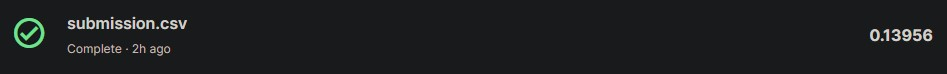

Na competição do Kaggle, obtive um score de 0.13956 no RMSE (Root Mean Square Error).